<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/transaccionesBancariasFraudulentas_conK_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import matplotlib.pyplot as PyPlot
import seaborn as SeaBorn
import numpy as NumPy

#vamos a usar un paquete de sklearn para dividir el dataset en una parte de entrenamiento y una parte de evaluación 
#ambos como DataFrames
from sklearn.model_selection import train_test_split
#importamos el paquete de SKLearn que hace K-Means
from sklearn.cluster import KMeans

Vamos a importar un dataset que identifica transacciones bancarias (De tarjeta de crédito) correctas y fraudulentas. En esta ocasión lo usaremos local.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving transacciones.csv to transacciones (1).csv


In [ ]:
import io
datasetTarjetaCredito = Pandas.read_csv(io.BytesIO(uploaded['transacciones.csv']))
datasetTarjetaCredito

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,fraudulento
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,fraudulento
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,fraudulento
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,fraudulento
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,fraudulento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,165427,117425.0,-0.139789,1.208347,-0.314722,-0.718123,1.128276,-0.772012,1.416751,-0.558400,0.569635,0.190237,-0.416064,-0.078610,0.357327,-1.656813,-0.186448,0.118349,0.107524,-0.344144,-0.274121,0.431540,-0.507641,-0.798971,0.028706,0.564125,-0.354111,0.065295,0.118542,-0.238481,16.27,correcto
988,80438,58487.0,1.357898,-0.529910,0.415781,-0.562735,-1.177604,-1.056265,-0.455571,-0.214016,-0.785976,0.679545,-0.542930,-0.344263,-0.049978,0.163548,1.013572,-1.156649,-0.052886,0.906472,-0.761270,-0.462527,-0.482297,-0.983657,0.131960,0.376931,0.076931,0.904296,-0.060713,0.013295,25.08,correcto
989,132033,79827.0,-2.349466,-0.951473,1.927500,3.696688,-1.142302,1.010980,0.125638,0.406342,-0.205704,0.714218,0.349972,0.142239,-1.103477,-0.313582,-1.157760,-0.244024,0.463046,0.642518,1.544204,-0.497899,-0.036463,0.794493,0.462996,0.592176,-0.230993,0.315811,0.023540,-0.337597,261.79,correcto
990,22967,32524.0,-1.425396,0.405940,1.331413,1.122756,-1.293264,-0.257002,-0.748075,0.653352,0.241141,0.748608,1.144584,-0.031762,-1.242251,0.519303,1.589515,0.337857,0.001283,1.124540,1.463530,-0.095651,0.123369,0.672348,0.475708,0.534488,-0.739895,0.491380,0.213698,0.131120,46.03,correcto


vamos a ver cómo es el histograma de las variables para ver cuales variables son comparables entre sí y ver dónde se pueden separar. En rojo siempre van a estar los fraudulentos y en azul los correctos

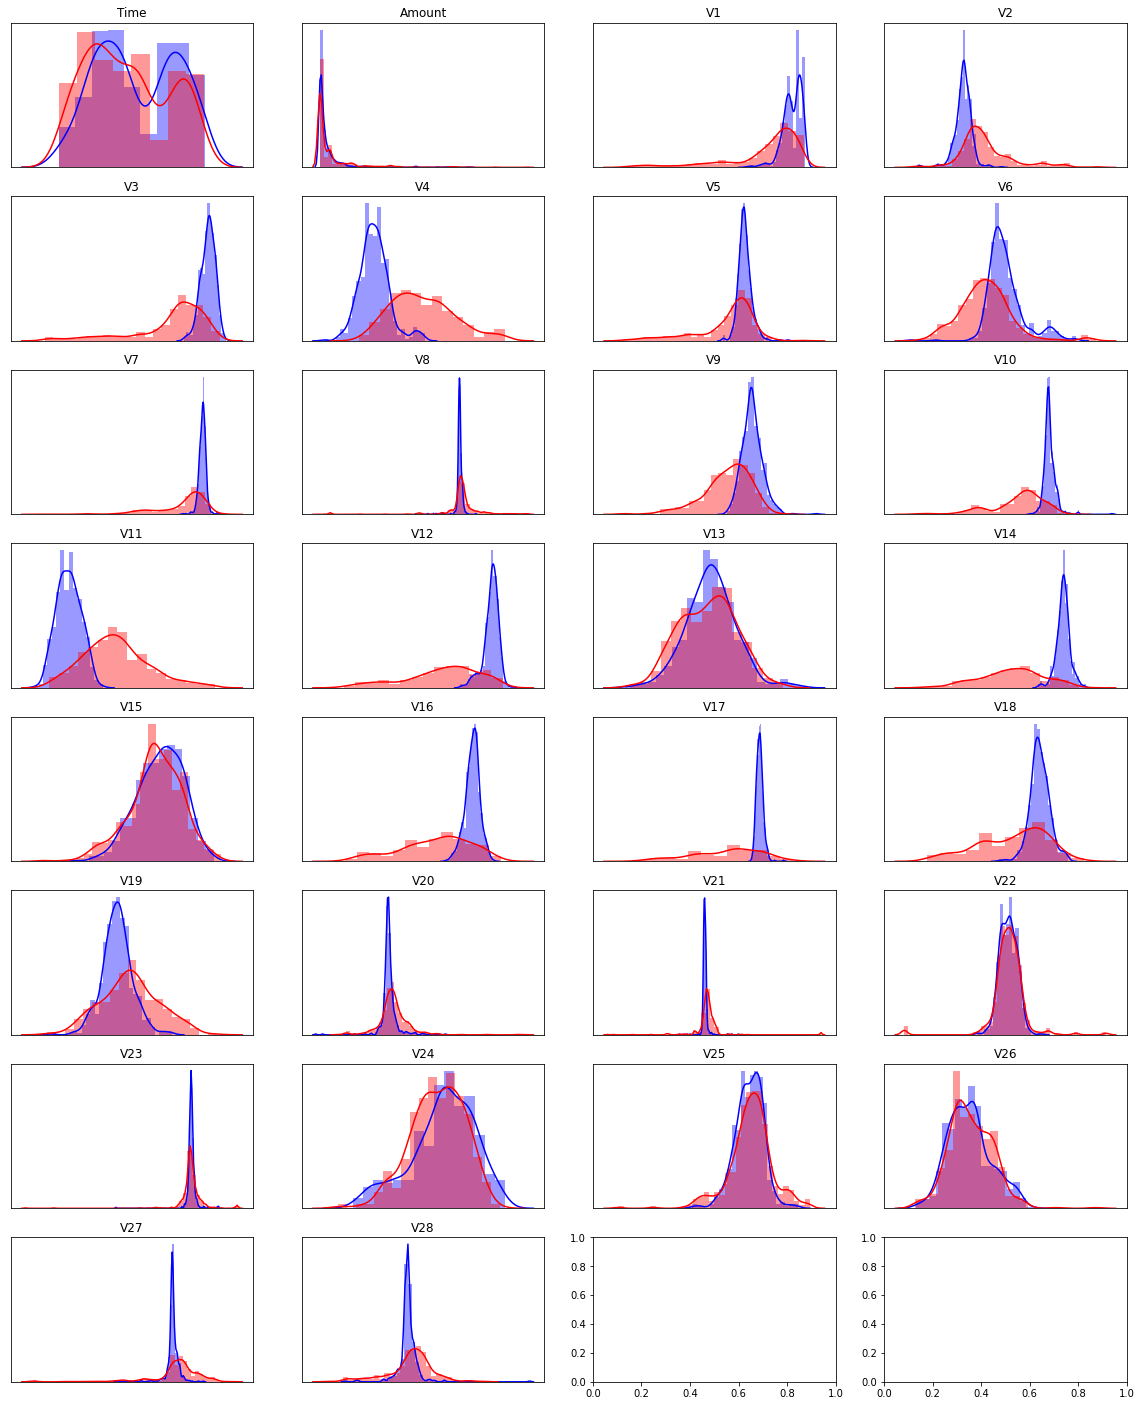

In [ ]:
def histogramaConjunto(nomVariable):
    PyPlot.title(nomVariable)
    SeaBorn.distplot(datasetTarjetaCredito.loc[datasetTarjetaCredito['Class']=='correcto'][nomVariable],label='correcto',color='blue')
    SeaBorn.distplot(datasetTarjetaCredito.loc[datasetTarjetaCredito['Class']=='fraudulento'][nomVariable],label='fraudulento',color='red')
    PyPlot.xticks([])
    PyPlot.yticks([])
    PyPlot.xlabel("")

variables = ['Time','Amount']+['V'+str(i) for i in range(1,29)]

PyPlot.subplots(8,4,figsize=(20,25))
plotIndex = 1
for var in variables:
    PyPlot.subplot(8,4,plotIndex)
    histogramaConjunto(var)
    plotIndex +=1

Vamos a plotear algunas de las variables en un pair plot para ver la dispersión de los en algunas variables en el espacio.

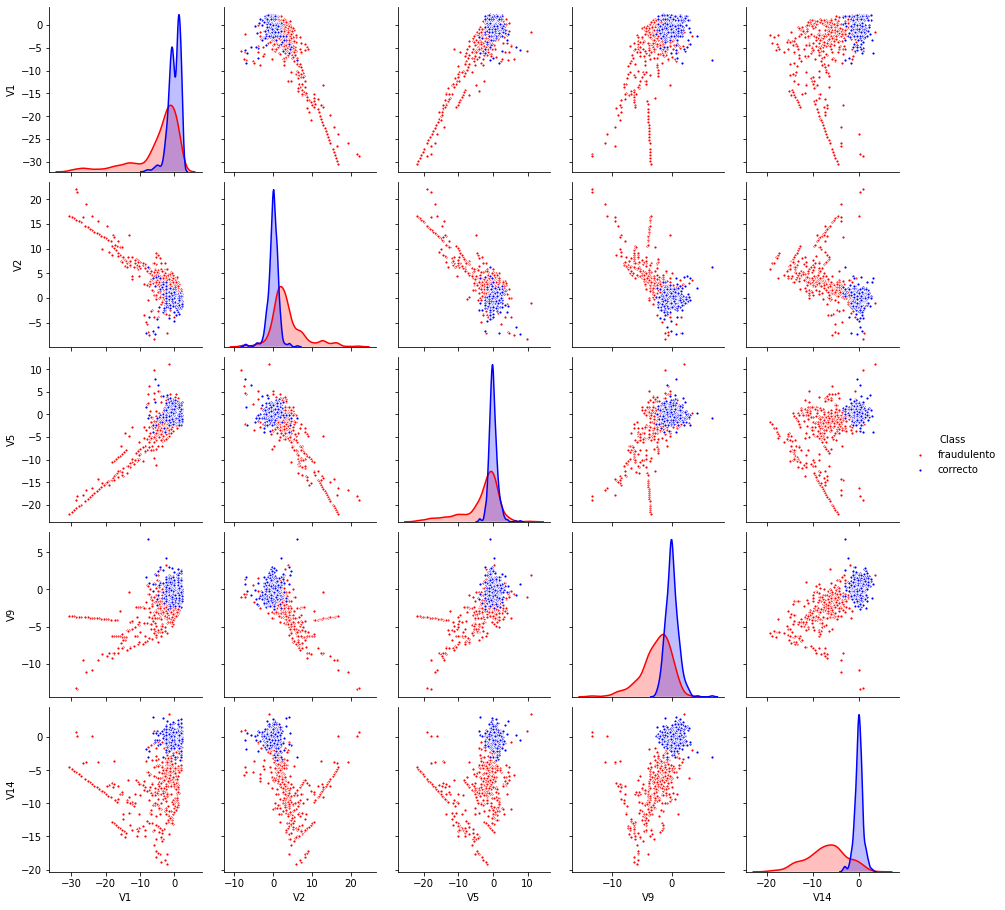

In [ ]:
subDataSet = datasetTarjetaCredito[['V1','V2','V5','V9','V14','Class']]
SeaBorn.set_palette(SeaBorn.color_palette(['#FF0000','#0000FF']))
pairPlot = SeaBorn.pairplot(subDataSet,hue='Class',markers='.',)
pairPlot

Vamos a hacer un clasificador por k-means para este dataset. Primero debemos dividir el dataset en una parte de entrenamiento y otra de prueba. Para esto usaremos comandos de la librería SKLearn. 

Mostraremos diferentes estadísticos acerca del conjunto de entrenamiento.

In [ ]:
train,test = train_test_split(datasetTarjetaCredito,test_size=0.25)
train.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.00000
mean,128296.154570,86186.756720,-2.164616,1.670867,-3.215135,2.193335,-1.413420,-0.682790,-2.571446,0.313870,-1.226507,-2.686351,1.799756,-3.039012,-0.041869,-3.335502,0.033686,-1.969726,-3.156665,-1.036820,0.304481,0.199653,0.297258,0.002588,-0.042637,-0.037309,0.011232,0.027063,0.100865,0.052552,106.49746
std,82455.788933,47732.256744,5.308425,3.601389,6.015018,3.126915,4.049132,1.749429,5.699341,4.627365,2.285280,4.455499,2.782314,4.470099,1.066789,4.656903,0.983873,3.346413,5.783881,2.332557,1.232428,1.111168,2.567746,1.113734,1.223077,0.562383,0.679789,0.474657,0.953459,0.403013,227.56354
min,541.000000,406.000000,-30.552380,-8.402154,-31.103685,-4.542290,-22.105532,-6.809937,-43.557242,-41.044261,-13.434066,-24.588262,-2.512291,-18.683715,-3.329654,-19.214325,-4.498945,-13.563273,-23.815636,-9.287832,-3.451059,-5.415723,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.127698,-7.263482,-1.796363,0.00000
25%,53570.500000,46046.500000,-2.599443,-0.117717,-4.754853,-0.092994,-1.688687,-1.463010,-2.937811,-0.191811,-2.190471,-4.434228,-0.341075,-5.292676,-0.737819,-6.294729,-0.556327,-3.294478,-5.104658,-1.603430,-0.451038,-0.182489,-0.172814,-0.550670,-0.233006,-0.359190,-0.319411,-0.298028,-0.058680,-0.047701,1.98000
50%,125139.500000,77551.500000,-0.696377,0.889064,-1.169925,1.284758,-0.420901,-0.638118,-0.617177,0.154970,-0.689708,-0.794526,0.992630,-0.820817,0.005576,-0.927214,0.130366,-0.660653,-0.447609,-0.338029,0.175609,0.018647,0.150057,-0.040149,-0.036236,0.024576,0.044333,-0.008932,0.054470,0.036113,21.66500
75%,194039.500000,130414.250000,1.079751,2.544397,0.402102,4.087309,0.483633,0.097086,0.303951,0.851654,0.130831,0.010193,3.506013,0.137285,0.641669,0.129246,0.777070,0.286827,0.282363,0.398839,0.972270,0.431989,0.652748,0.534098,0.171368,0.376713,0.379571,0.320211,0.460747,0.224424,99.99000
max,284113.000000,172163.000000,2.261416,22.057729,2.773634,12.114672,11.095089,6.474115,5.802537,20.007208,6.750766,11.410979,12.018913,2.739112,3.610332,3.442422,2.471358,2.581851,6.739384,3.531250,4.038231,11.059004,27.202839,8.361985,5.466230,1.191631,2.208209,2.745261,3.052358,1.779364,2125.87000


Ahora vamos a construir y entrenar el clasificador por K-Means usando SKLearn.

In [ ]:
#importamos el paquete de SKLearn que hace K-Means
from sklearn.cluster import KMeans
#creamos el clasificador de K-Means
kMeans = KMeans(n_clusters=2) #nótese que hemos puesto que dos clusters
#separamos los datos en la variable objetivo y el resto (las coordenadas de los puntos)
X_data = train[variables]
Y_data = train['Class']
#ahora entrenamos el clasificador
kMeans.fit(X_data)
Y_predicted = kMeans.predict(X_data)

Ahora tenemos que ver el rendimiento del clasificador, con lo cual nos vamos a apoyar en la matriz de confusión de éste. Notemos que esto está sobre los datos de entrenamiento.

In [ ]:
#vamos a cambiar el nombre de la clase a una variable categórica
def cambiarNombre(x):
    if x == 0:
        return 'correcto'
    else:
        return 'fraudulento'

confusion = {'verdaderos':{'correcto':0,'fraudulento':0},'falsos':{'correcto':0,'fraudulento':0}}
for i in range(len(Y_data)):
    etiquetaPred = cambiarNombre(Y_predicted[i])
    if etiquetaPred == Y_data.iloc[i]:
        confusion['verdaderos'][etiquetaPred] +=1   
    else:
        confusion['falsos'][etiquetaPred] +=1

matrizConfusion = Pandas.DataFrame(confusion)
exactitud = float(matrizConfusion['verdaderos'].sum())/float(matrizConfusion.values.sum())
recordacion = float(matrizConfusion['verdaderos']['correcto'])/float(matrizConfusion['verdaderos']['correcto']+matrizConfusion['falsos']['correcto'])
precision = float(matrizConfusion['verdaderos']['correcto'])/float(matrizConfusion['verdaderos'].sum())
FScore = 2*recordacion*precision/(precision+recordacion)                      
print("exactitud: ","%{:,.2f}".format(100*exactitud))
print("recordación: ","%{:,.2f}".format(100*recordacion))
print("precision: ","%{:,.2f}".format(100*precision))
print("F-Score: ","{:,.2f}".format(FScore))
print("Matriz de confusión")
matrizConfusion

exactitud:  %54.44
recordación:  %57.19
precision:  %41.23
F-Score:  0.48
Matriz de confusión


,verdaderos,falsos
correcto,167,125
fraudulento,238,214


Ahora calculamos los estadísticos del clasificador sobre los datos de validación.

In [ ]:
#repetimos lo mismo con los datos de evaluación
#separamos los datos en la variable objetivo y el resto (las coordenadas de los puntos)
X_data = test[variables]
Y_data = test['Class']
Y_predicted = kMeans.predict(X_data)
#ahora vamos a construir una matriz de confusión para ellos
confusion = {'verdaderos':{'correcto':0,'fraudulento':0},'falsos':{'correcto':0,'fraudulento':0}}
for i in range(len(Y_data)):
    etiquetaPred = cambiarNombre(Y_predicted[i])
    if etiquetaPred == Y_data.iloc[i]:
        confusion['verdaderos'][etiquetaPred] +=1   
    else:
        confusion['falsos'][etiquetaPred] +=1

matrizConfusion = Pandas.DataFrame(confusion)
exactitud = float(matrizConfusion['verdaderos'].sum())/float(matrizConfusion.values.sum())
recordacion = float(matrizConfusion['verdaderos']['correcto'])/float(matrizConfusion['verdaderos']['correcto']+matrizConfusion['falsos']['correcto'])
precision = float(matrizConfusion['verdaderos']['correcto'])/float(matrizConfusion['verdaderos'].sum())
FScore = 2*recordacion*precision/(precision+recordacion)                      
print("exactitud: ","%{:,.2f}".format(100*exactitud))
print("recordación: ","%{:,.2f}".format(100*recordacion))
print("precision: ","%{:,.2f}".format(100*precision))
print("F-Score: ","{:,.2f}".format(FScore))
print("Matriz de confusión")
matrizConfusion

exactitud:  %43.95
recordación:  %43.95
precision:  %100.00
F-Score:  0.61
Matriz de confusión


,verdaderos,falsos
correcto,109,139
fraudulento,0,0
